# Methodology

- Step 1: Choose the number of clusters to create (K value).

- Step 2: Randomly select K distinct data points. Treat these K points as the 'cluster' points.

- Step 3: Assign each remaining point to the nearest 'cluster' point. (We are using the distance metric to judge the nearest point).

### Iteration Process

- Step 4: Calculate the centre of each cluster by calculating the mean value of each point vector in each cluster.

- Step 5: Now assign each point to the new nearest cluster centre.

- Step 6: Repeat steps 4 and 5 until there are no new cluster reassignments.

# EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


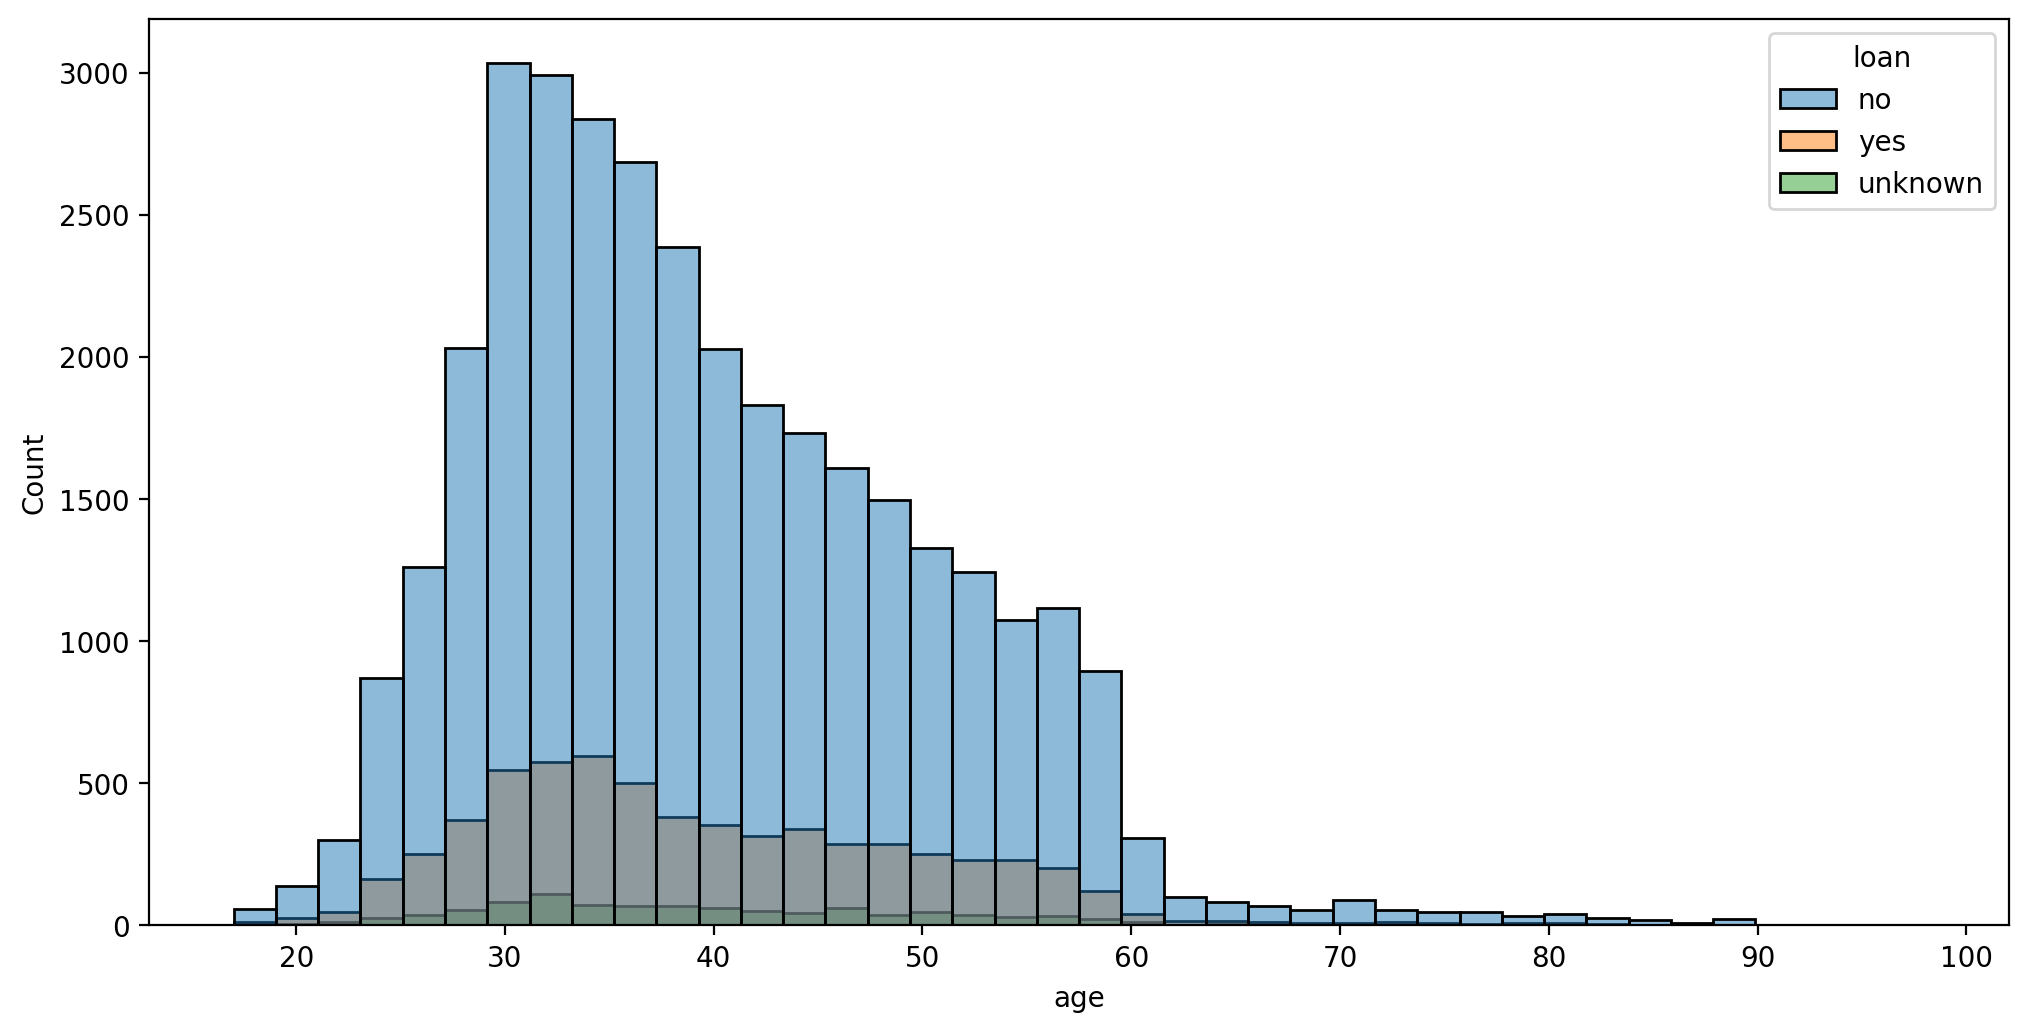

In [7]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=40,hue='loan');

Most people have pday of 999 which is a substitute code for never been contacted so we can filter these customers out.

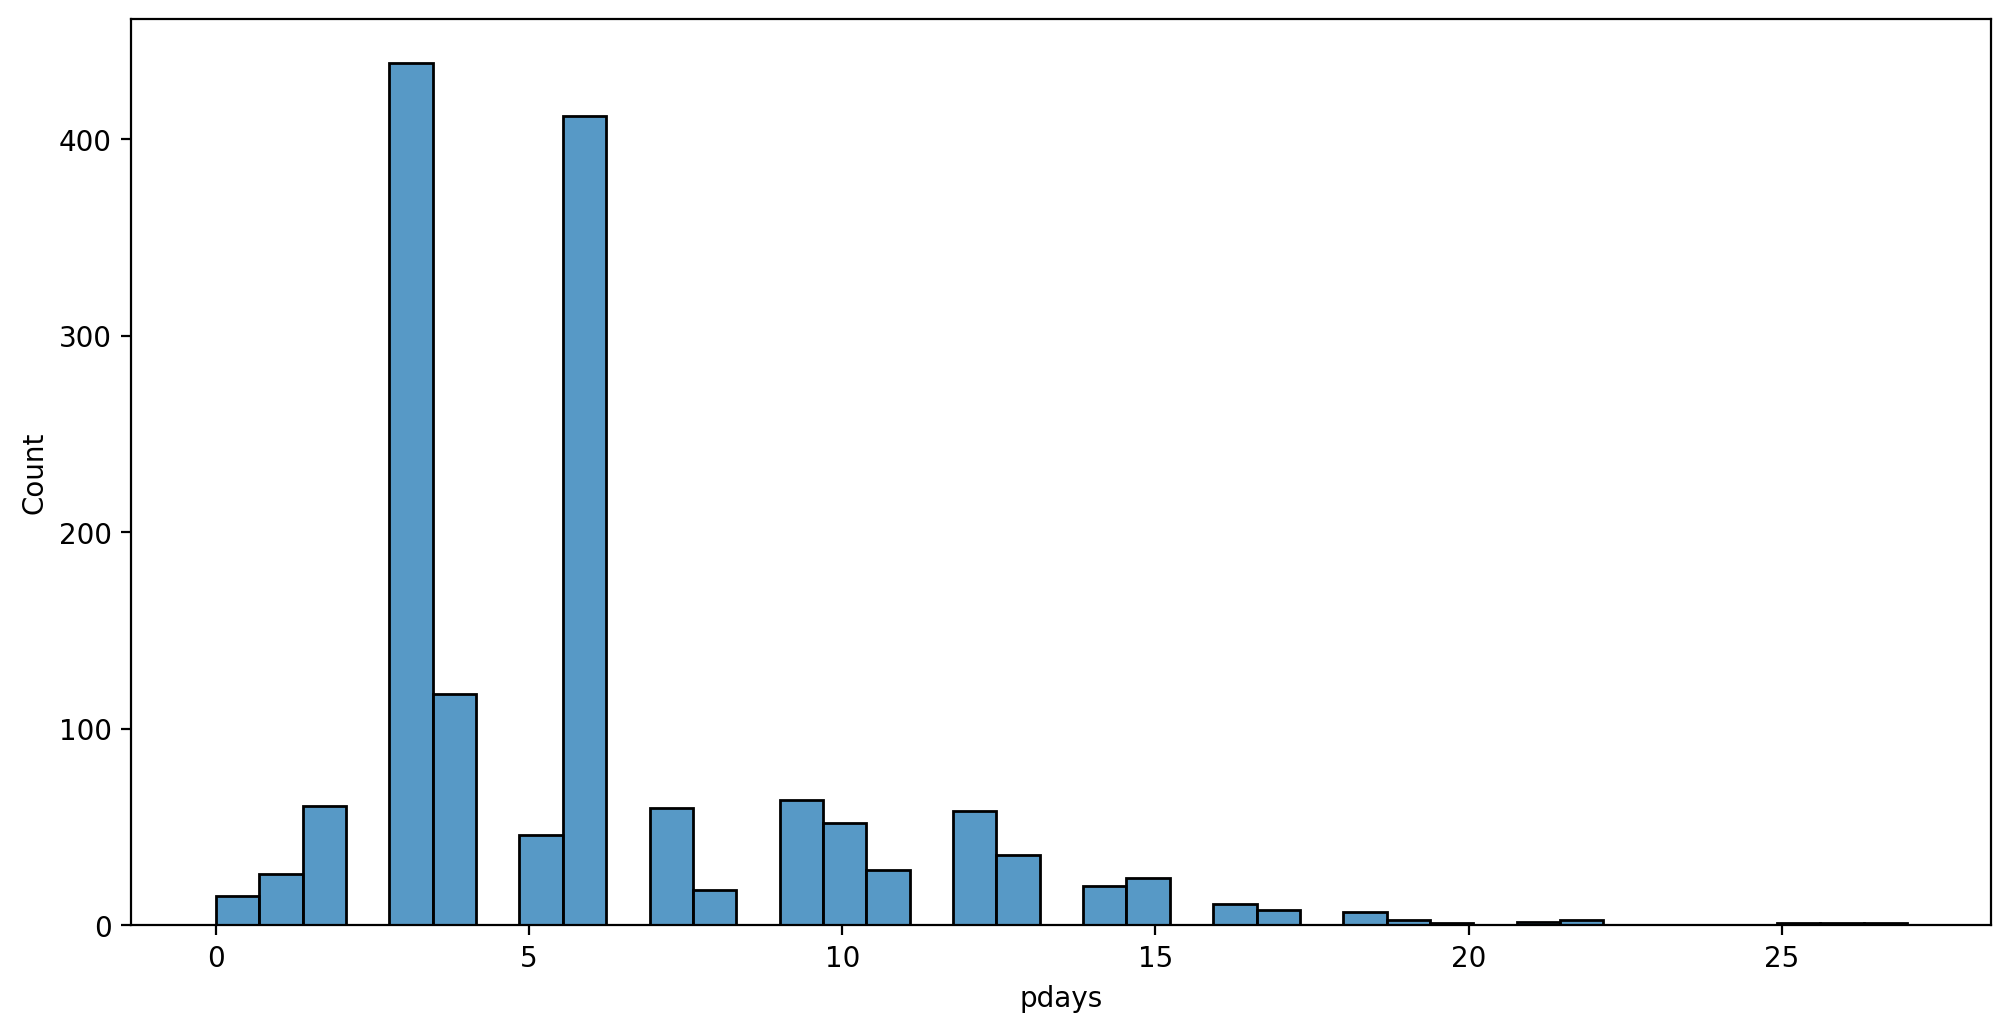

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays');

In [9]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [10]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

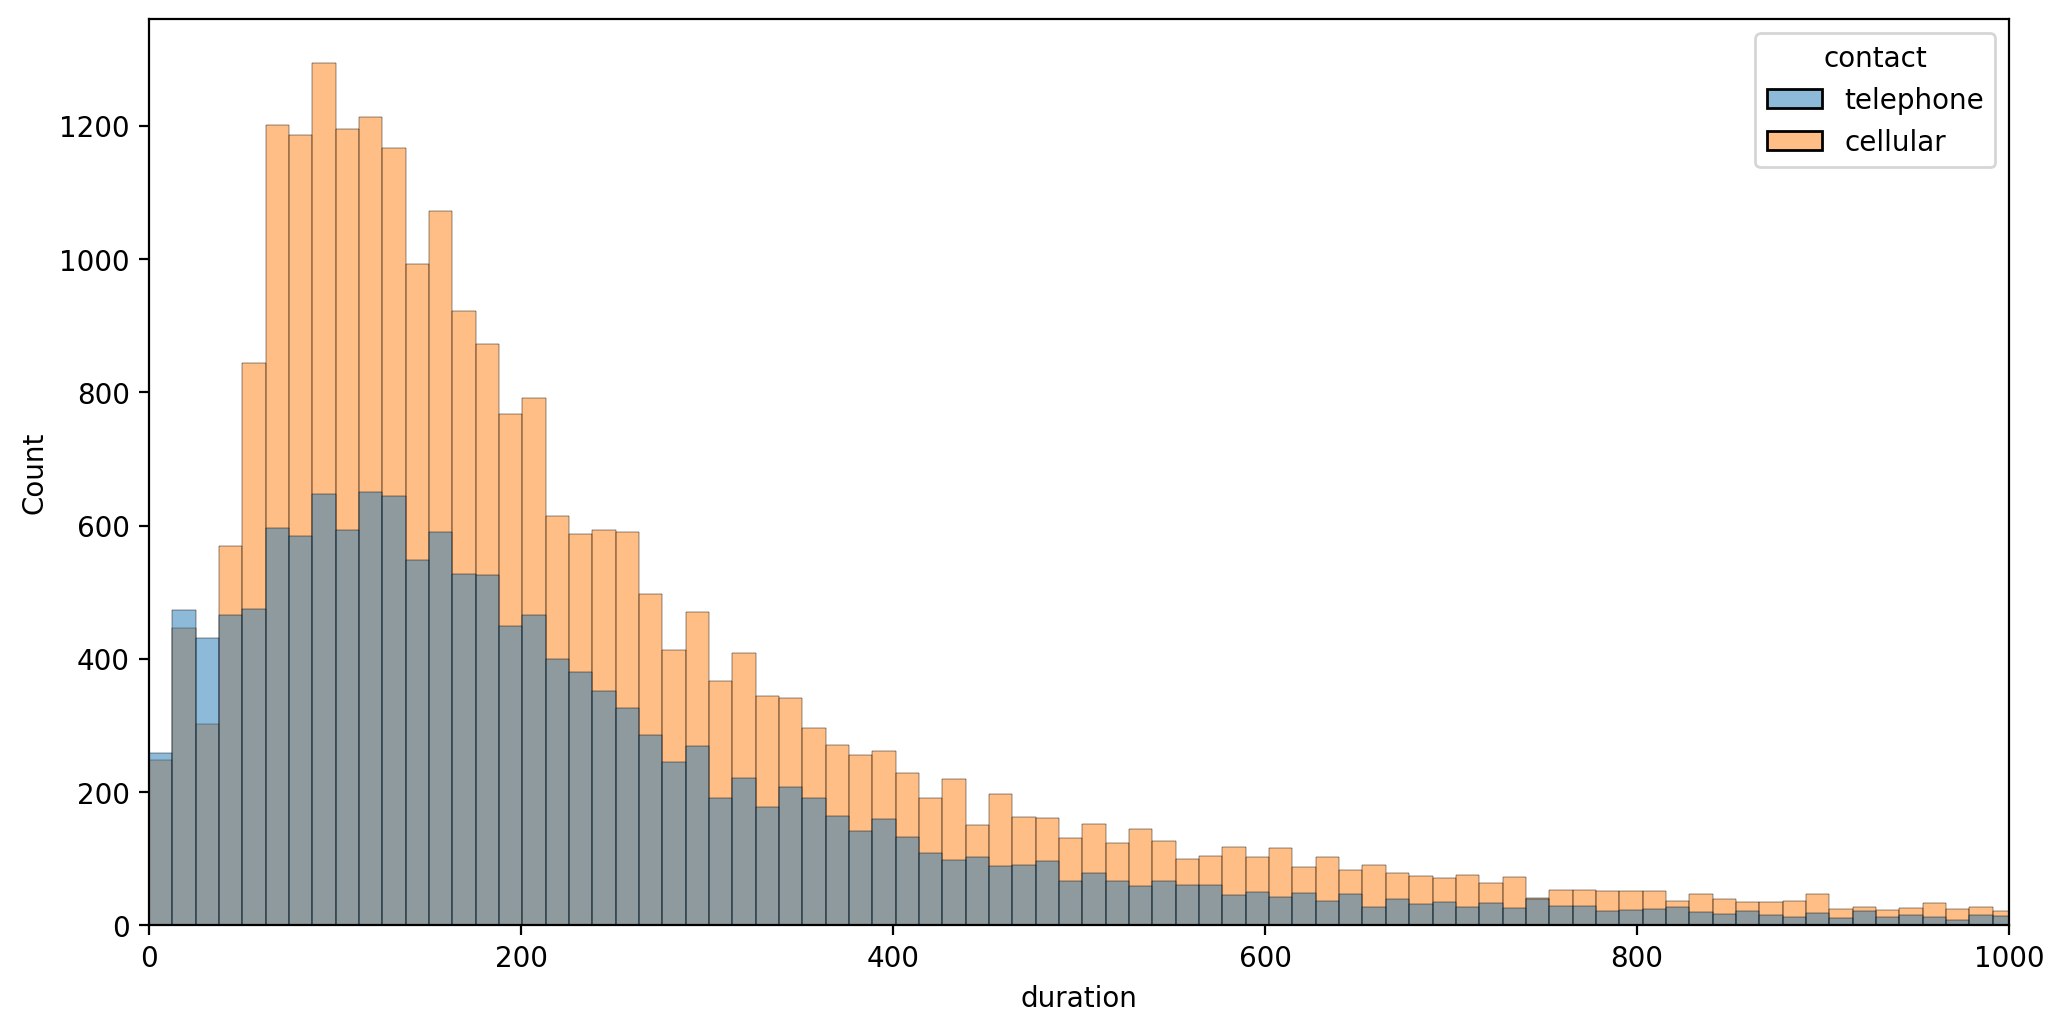

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,1000);

The behaviour of these curves are extremely similar. Cell phones just happen to be more popular than landline telephones.

<AxesSubplot:xlabel='contact', ylabel='count'>

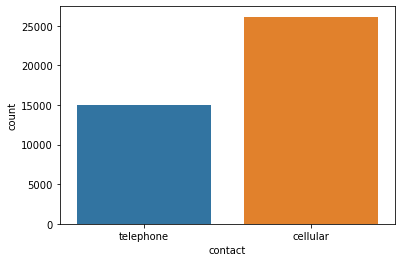

In [12]:
sns.countplot(data=df,x='contact')

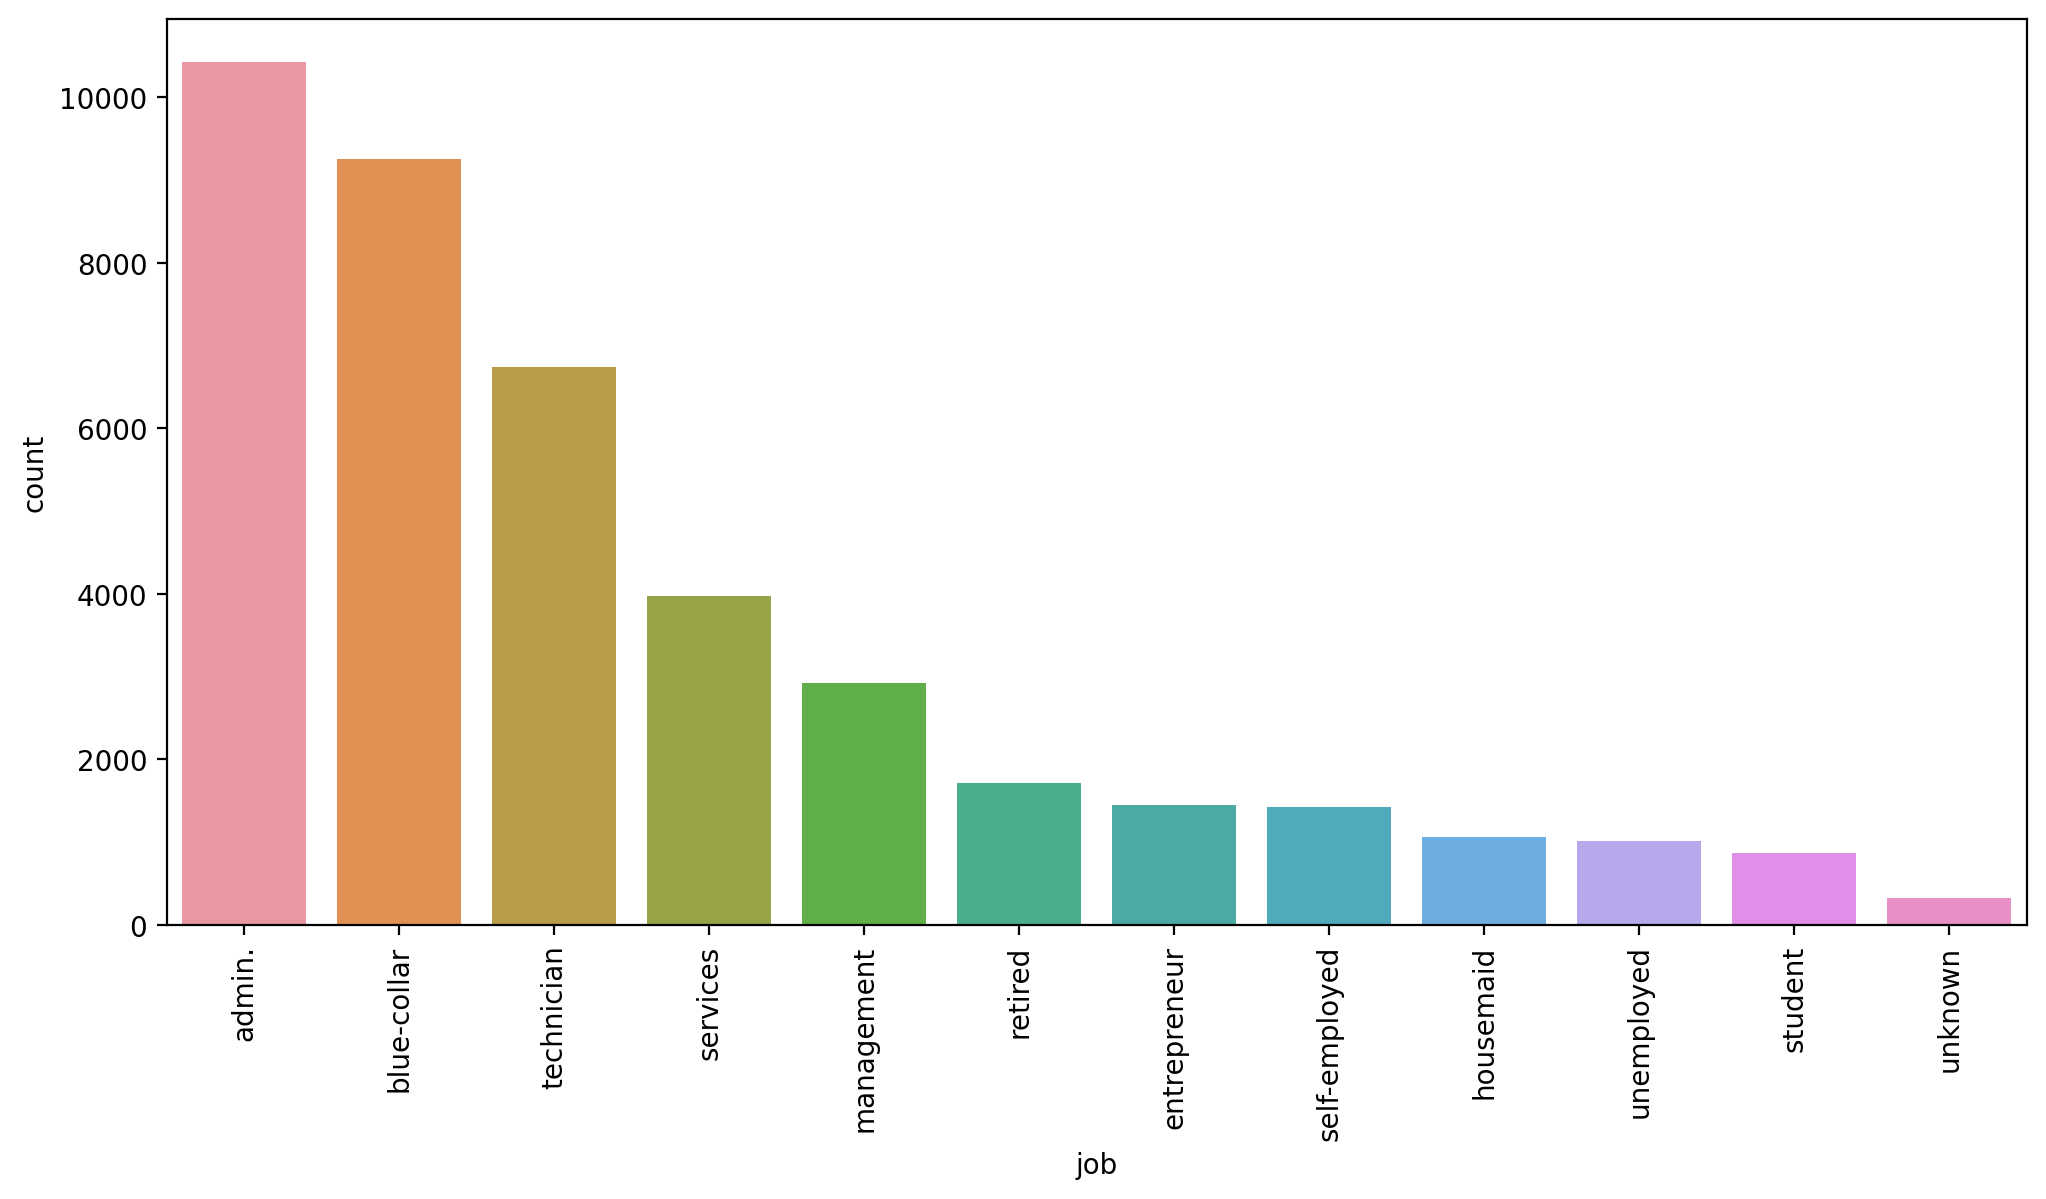

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

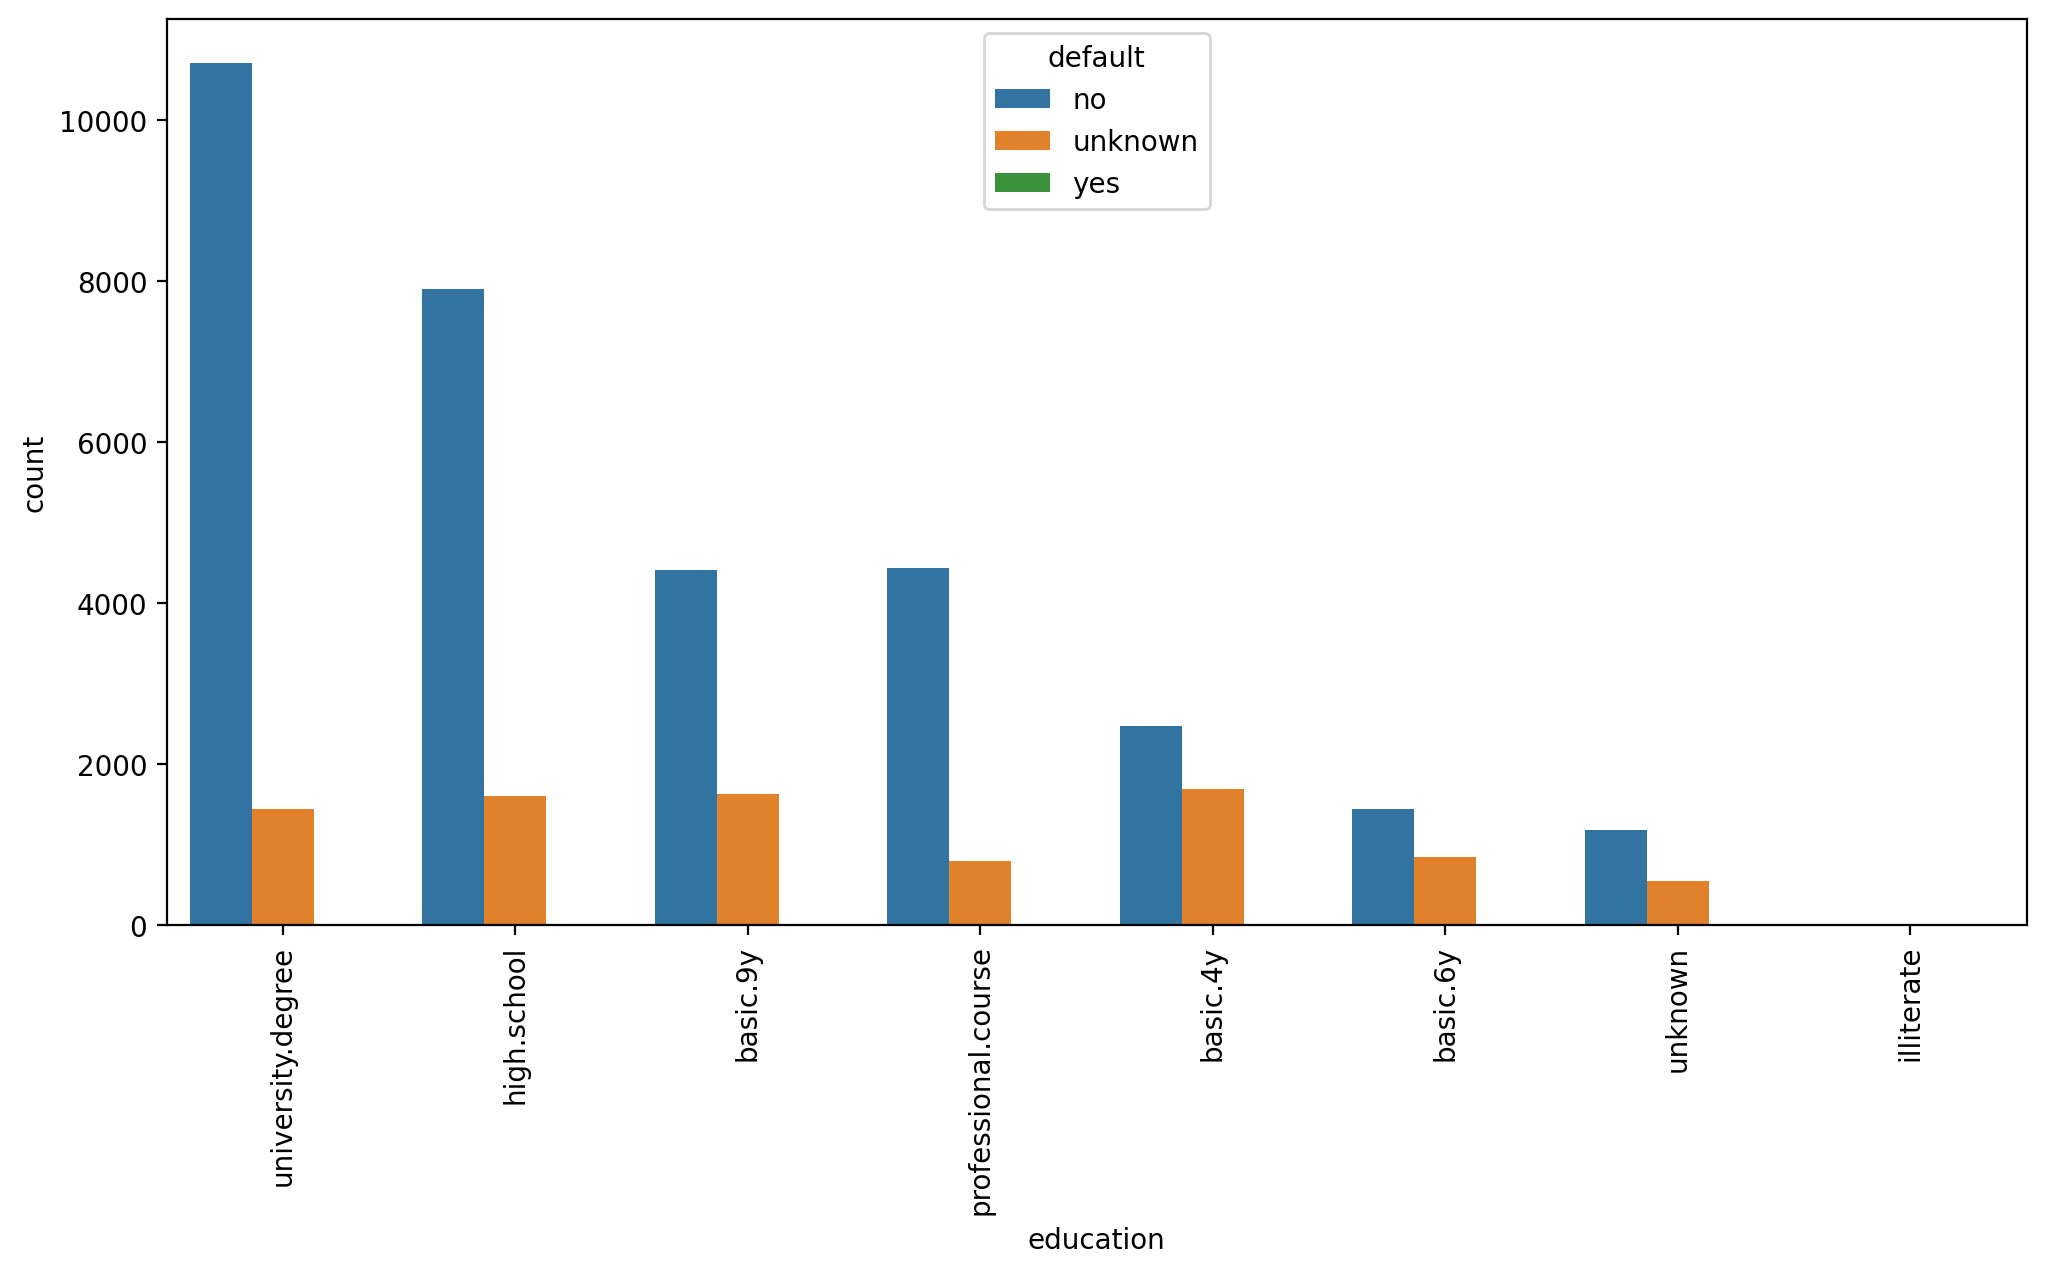

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

In [15]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [16]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

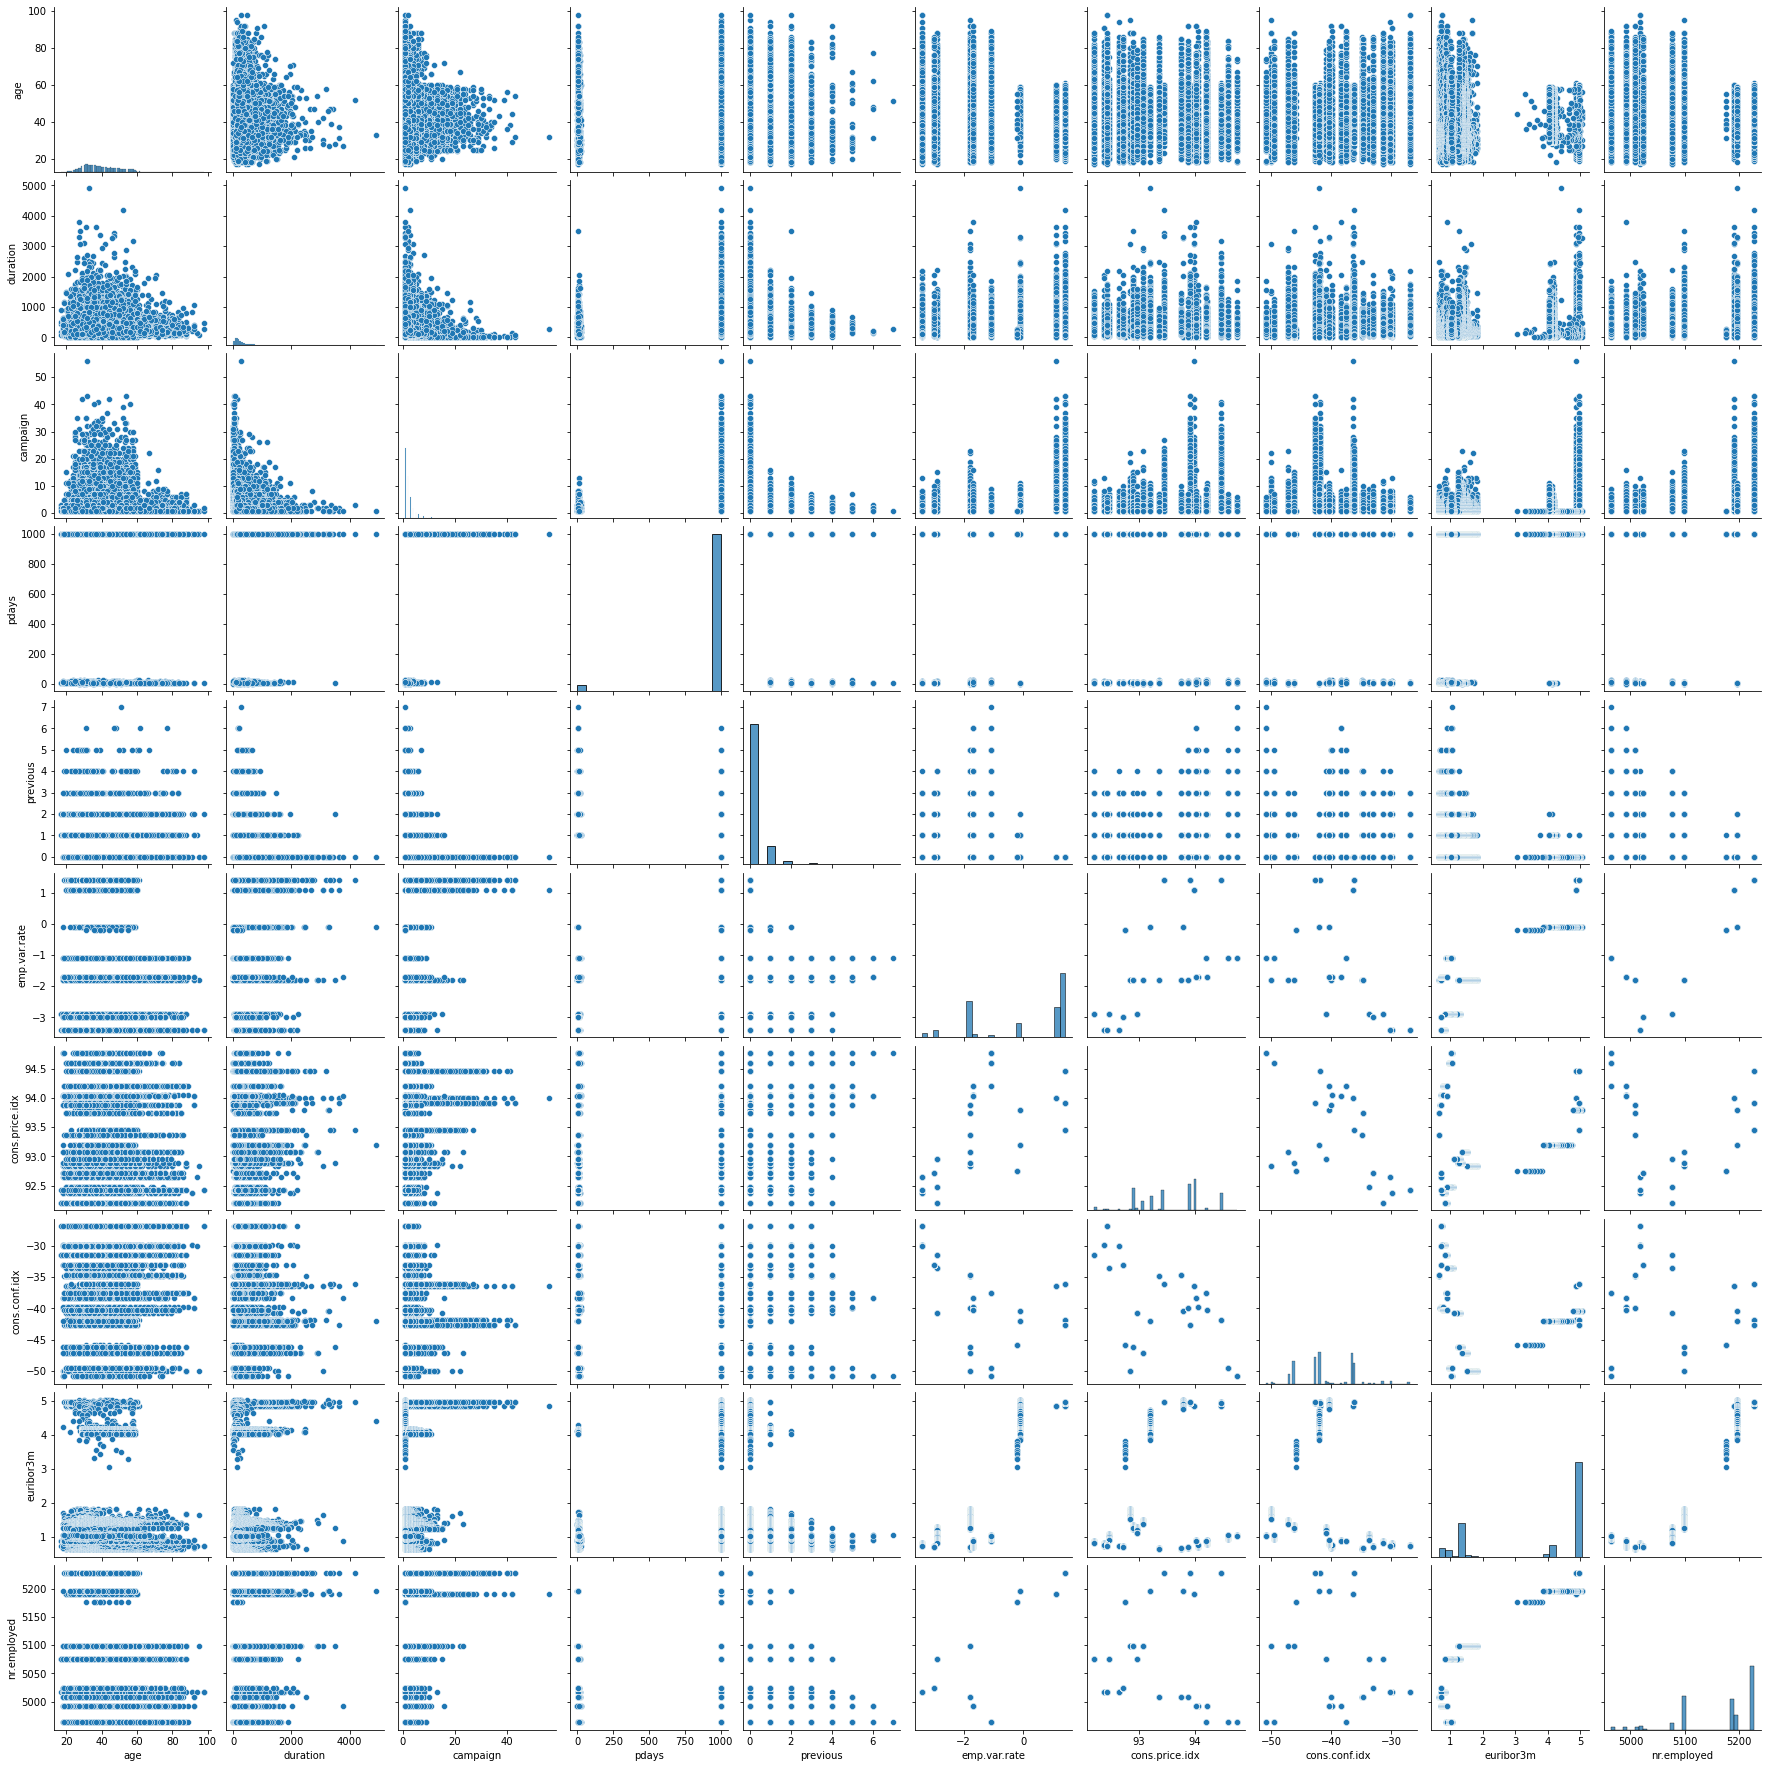

In [17]:
sns.pairplot(df)

# K-Means Clustering Code

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Intuitively, we know we cannot use raw categorical data for K-means clustering as the method relies on distance metrics. So we need dummy variables.

We also do not need to worry about dropping columns to avoid the dummy variable trap and issues with multicollinearity because unsupervised learning does not have coefficients attached to the dummy variables.

In [19]:
X = pd.get_dummies(df)

In [20]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


Because the feature spaces are vastly different, we need to scale the data to not distorted any particular dimension when looking for clusters.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

There is no data leakage in unsupervised learning as there is no test set.

In [23]:
scaled_X = scaler.fit_transform(X)

In [24]:
from sklearn.cluster import KMeans

In [25]:
# help(KMeans)

Start by using 2 clusters since intuitively, it makes sense for there to be 2 groups. One we want to market to and another we do not want to market to.

In [26]:
model = KMeans(n_clusters=2)

In [27]:
# fit_transform
cluster_labels = model.fit_predict(scaled_X)

In [28]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X['Cluster'] = cluster_labels

We have now 'discovered' the y

In [30]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


Now would be a good time to check the correlation between features and its cluster assignment.

In [31]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

# Choosing a K Value

Keep track of the sum of squared distances (SSD) value for a range of different K values.

Then look for a K value where the rate of reduction in SSD declines so much so that adding an exra cluster is not obtaining enough clarity of cluster separation to justify increasing K. This is NOT the same as minimising SSD.

This is known as the 'elbow' method, similar to KNN.

In [32]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    
    ssd.append(model.inertia_) # SSD point --> cluster centre

In [33]:
ssd

[2469792.367302057,
 2370786.8412902267,
 2271503.6649939073,
 2200693.9495959803,
 2161428.862559141,
 2083808.1796885761,
 2077541.024002592,
 2030125.6912093402]

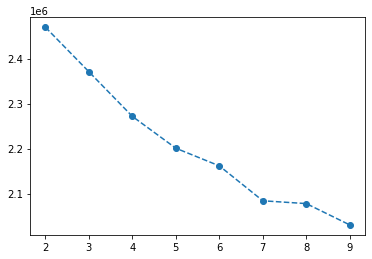

In [34]:
plt.plot(range(2,10),ssd,'o--');

In [35]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271504e+06
3    2.200694e+06
4    2.161429e+06
5    2.083808e+06
6    2.077541e+06
7    2.030126e+06
dtype: float64

In [36]:
pd.Series(ssd).diff()

0             NaN
1   -99005.526012
2   -99283.176296
3   -70809.715398
4   -39265.087037
5   -77620.682871
6    -6267.155686
7   -47415.332793
dtype: float64

# K-Means Colour Quantisation

In [37]:
import matplotlib.image as mpimg

# .jpg .png --> numpy array

In [38]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [39]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [40]:
image_as_array.shape # (height,width,colour) RGB

(1401, 934, 3)

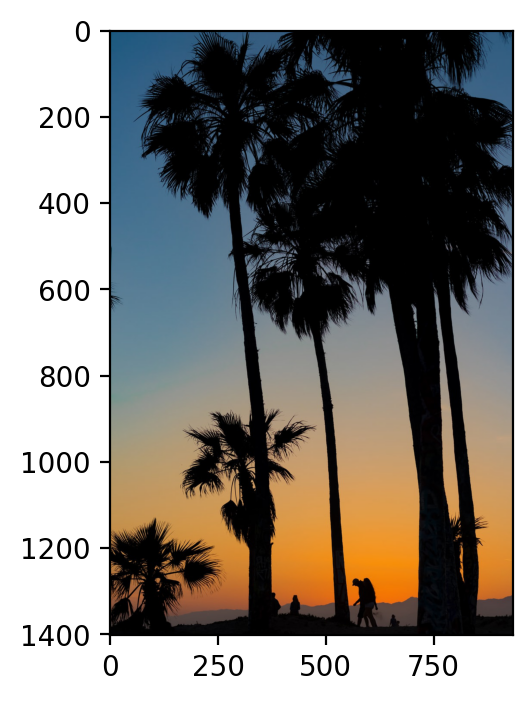

In [41]:
plt.figure(dpi=200)
plt.imshow(image_as_array)

In [42]:
# (H, W, C) -> 2D (H*W, C)

In [43]:
(h,w,c) = image_as_array.shape

In [44]:
h

1401

In [45]:
w

934

In [46]:
c

3

In [47]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [48]:
model = KMeans(n_clusters=6)

In [49]:
labels = model.fit_predict(image_as_array2d)

In [50]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [53]:
rgb_codes

array([[ 71, 110, 138],
       [  3,   3,   4],
       [219, 135,  46],
       [193, 155, 108],
       [ 67,  61,  62],
       [138, 144, 144]])

In [54]:
rgb_codes[labels]

array([[ 71, 110, 138],
       [ 71, 110, 138],
       [ 71, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [55]:
quantised_image = np.reshape(rgb_codes[labels],(h,w,c))

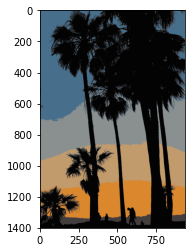

In [57]:
plt.imshow(quantised_image) # 6 colours